## Usando o K_Means com dados do Lidar

Neste notebook utilizaremos um algoritmo de aprendizagem de máquina não-supervisionado para clusterizar dados do LIDAR contrato pela Prefeitura de São Paulo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline
seed = 42

In [2]:
cols = ['X', 
        'Y',
       'Z',
       ]

In [3]:
path = 'amostraHenriq_01.txt'

In [4]:
def gerar_df(path, columns):
    
    with open(path) as f:
        dados = f.readlines()
        
    dados = [linha.split(',')[:3] for linha in dados]
    df = pd.DataFrame(data = dados, columns = cols[:3])
    df = arrumar_dtypes(df)
    
    return df

In [5]:
def arrumar_dtypes(df):
    
    for col in df:
        df.loc[:,col] = df[col].astype(float)
    return df

In [6]:
df = gerar_df(path, cols)

In [7]:
def plotar_3d(df, size = 0.00001):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.figsize = (12, 12)
    if 'labels' in df:
        ax.scatter(df.X, df.Y, df.Z, marker='o', s = size, c = df['labels'])
    else:
        ax.scatter(df.X, df.Y, df.Z, marker='o', s = size)


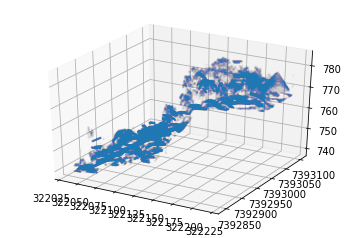

In [8]:
plotar_3d(df)

In [9]:
def gerar_kmeans(df, n_k):
    kmeans = KMeans(n_clusters=n_k, random_state= seed).fit(df)
    return kmeans

In [10]:
K = gerar_kmeans(df, 3)

In [11]:
df['labels'] = K.labels_

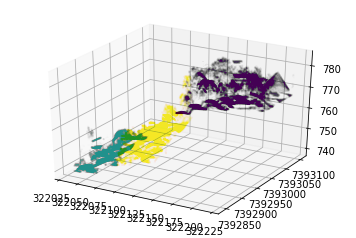

In [12]:
plotar_3d(df)

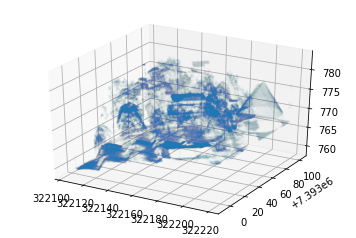

In [14]:
df_sup = df[df['labels'] == 0].reset_index(drop = True).drop(['labels'], axis = 1)
plotar_3d(df_sup, size = 0.0001)

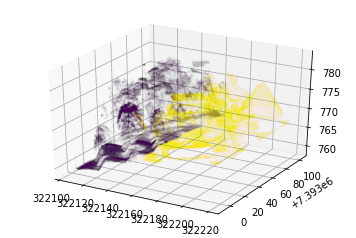

In [15]:
K2 = gerar_kmeans(df_sup, n_k = 2)
df_sup['labels'] = K2.labels_
plotar_3d(df_sup, size = 0.0001)

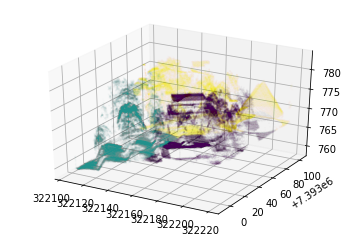

In [16]:
df_sup.drop(['labels'], axis = 1, inplace = True)
K3 = gerar_kmeans(df_sup, n_k = 3)
df_sup['labels'] = K3.labels_
plotar_3d(df_sup, size = 0.0001)

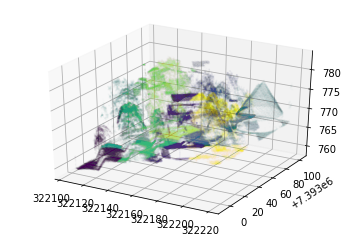

In [17]:
df_sup.drop(['labels'], axis = 1, inplace = True)
K3 = gerar_kmeans(df_sup, n_k = 10)
df_sup['labels'] = K3.labels_
plotar_3d(df_sup, size = 0.0001)